In [9]:
import fastai
import torch
import os
from fastai.vision import *
from shutil import copyfile
import random
from distutils.dir_util import copy_tree
from shutil import move
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams.update({'font.size': 16})

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs_A = os.listdir('/shared/Datasets_Classification/Classification_Clinic/NORMAL_LYMPHOCYTE')
random.shuffle(imgs_A)
os.path.join("/shared/Clinic-NormLinfo_Variant-cycGan/trainA", imgs_A[0])

'/shared/Clinic-NormLinfo_Variant-cycGan/trainA/LY_3777573.jpg'

In [3]:
df_Dataset_GAN = pd.DataFrame.from_dict(({'Conjunto Clinic (Train)': [1086,3000],
'Conjunto Can Ruti (Train)': [184,184],
})).rename({0:'ColorizationGAN (Normal Lymphocyte en Clínic)', 1:'CycleGAN (Atypical + Blast+ Variant en Clínic)'})
df_Dataset_GAN

,Conjunto Clinic (Train),Conjunto Can Ruti (Train)
ColorizationGAN (Normal Lymphocyte en Clínic),1086,184
CycleGAN (Atypical + Blast+ Variant en Clínic),3000,184


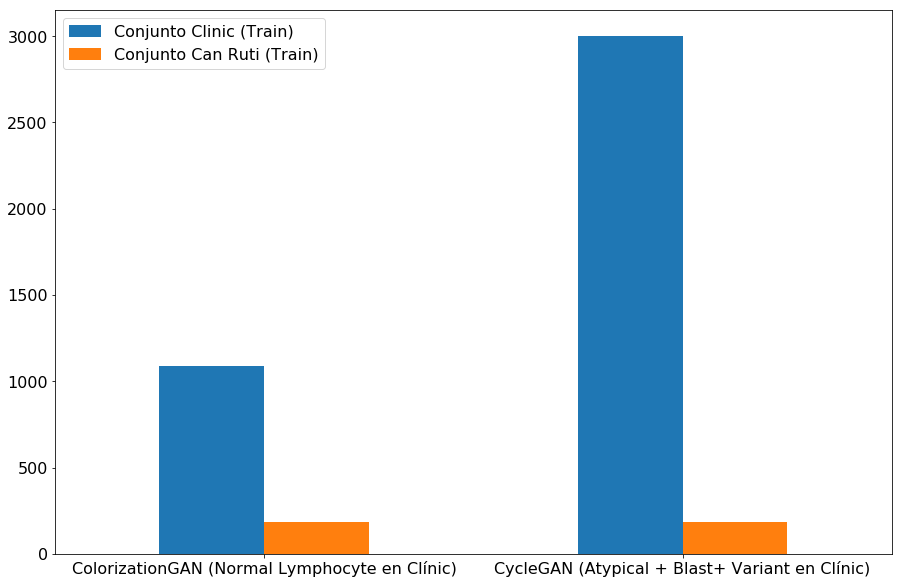

In [10]:
df_Dataset_GAN.plot.bar(figsize=(15,10), rot='0');

In [2]:
#count = 0
#for img in imgs_A:
#    source = os.path.join("/shared/Classification_Clinic/NORMAL_LYMPHOCYTE", img)
#    if '.jpg' in img:
#        #if count < 800:
#        target = os.path.join("/shared/Colorization_Clinic_CanRuti/train", img)
#        copyfile(source, target)
#        #else: 
#        #    target = os.path.join("/shared/Colorization_Clinic-CanRuti/testA", img)
#        #    copyfile(source, target)
#    count += 1
#


In [3]:
dic = {
      'ATYPICAL_LYMPHOCYTE':[],
      'VARIANT_LYMPHOCYTE':[],
      'BLAST':[]
     }

In [4]:

def print_dirs_recursively(root_dir):
    root_dir = os.path.abspath(root_dir)

    for item in os.listdir(root_dir):
        item_full_path = os.path.join(root_dir, item)
        if os.path.isdir(item_full_path):
            print_dirs_recursively(item_full_path)
        else: 
            if '/SLPC/' in item_full_path:
                dic['ATYPICAL_LYMPHOCYTE'].append(item_full_path)
            if '/REACTIUS/' in item_full_path:
                dic['VARIANT_LYMPHOCYTE'].append(item_full_path)
            if '/LA/' in item_full_path:
                dic['BLAST'].append(item_full_path)

print_dirs_recursively('/shared/can_ruti')

In [19]:
#for item in imgs_B:
#    if 'jpg' in item:
#        filename = os.path.basename(item)
#        copyfile(item, os.path.join("/shared/Colorization_Clinic_CanRuti/test", filename))
#
#


In [23]:
folder_classes = "/shared/Classification_CanRuti"
tfms = get_transforms(max_lighting=None, max_warp=None )